In [10]:
#contours
import cv2
import numpy as np

image = cv2.imread('tiger.jfif')
cv2.waitKey(0)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 30, 200)
cv2.waitKey(0)

contours, hierarchy = cv2.findContours(edged,
	cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.imshow('Canny Edges After Contouring', edged)
cv2.waitKey(0)

print("Number of Contours found = " + str(len(contours)))
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of Contours found = 138


In [1]:
#montage - method 1
import skimage.io
import skimage.util
a = skimage.io.imread('nature.jfif')
print(a.shape)
b = a // 2
c = a // 3
d = a // 4
m = skimage.util.montage([a, b, c, d], multichannel=True)
print(m.shape)
skimage.io.imsave('C:/Users/User/Desktop/mont.jpg', m)

(183, 275, 3)
(366, 550, 3)


C:\Users\User\AppData\Local\Temp\ipykernel_9456\3524741488.py:9: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  m = skimage.util.montage([a, b, c, d], multichannel=True)


In [4]:
#montage - method 2
import cv2
from PIL import Image
from skimage import io


IMAGE_WIDTH = 400
IMAGE_HEIGHT = 400

def create_collage(images):
    images = [io.imread(img) for img in images]
    images = [cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT)) for image in images]
    if len(images) > 2:
        half = len(images) // 2
        h1 = cv2.hconcat(images[:half])
        h2 = cv2.hconcat(images[half:])
        concat_images = cv2.vconcat([h1, h2])
    else:
        concat_images = cv2.hconcat(images)
    image = Image.fromarray(concat_images)

    # Image path
    image_name = "montage.png"
    image = image.convert("RGB")
    image.save(f"{image_name}")
    return image_name
images=["1img.jpg","Moon.jpg","unnamed.jpg","nature.jpg"]
#image1 on top left, image2 on top right, image3 on bottom left,image4 on bottom right
create_collage(images)

'montage.png'

In [5]:
#collage (montage)
import cv2
import numpy as np

image1=cv2.imread("1img.jpg")
image2=cv2.imread("Moon.jpg")
image3=cv2.imread("unnamed.jpg")
image4=cv2.imread("nature.jpg")

image1=cv2.resize(image1,(200,200))
image2=cv2.resize(image2,(200,200))
image3=cv2.resize(image3,(200,200))
image4=cv2.resize(image4,(200,200))

Horizontal1=np.hstack([image1,image2])
Horizontal2=np.hstack([image3,image4])
Vertical_attachment=np.vstack([Horizontal1,Horizontal2])
cv2.imshow("Final Collage",Vertical_attachment)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#canvas 
import numpy as np
import matplotlib.pyplot as plt
import cv2
canvas=np.ones((600,600,3))
plt.imshow(canvas)

cv2.imread()

In [6]:
#removing watermark
import cv2
import numpy as np

img = cv2.imread("Watermarks.png")
alpha = 2.0
beta = -160
new = alpha * img + beta
new = np.clip(new, 0, 255).astype(np.uint8)
cv2.imshow("Removed image", new)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
#logo removing - method 1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize']=(10,8)

In [7]:
def show_image(image,title='Image',cmap_type='gray'):
    plt.imshow(image,cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original,img_filtered,img_title_filtered):
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,8),sharex=True,sharey=True)
    ax1.imshow(img_original,cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered,cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

In [8]:
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

C:\Users\User\AppData\Local\Temp\ipykernel_9468\2895518581.py:4: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image_logo_removed=inpaint.inpaint_biharmonic(image_with_logo,


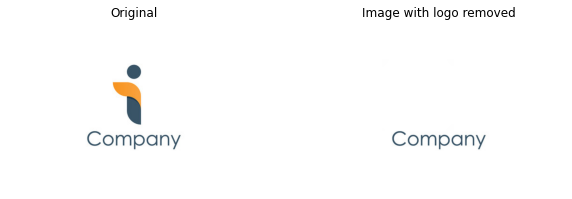

In [36]:
image_with_logo=plt.imread('logo.jpg')
mask=np.zeros(image_with_logo.shape[:-1])
mask[80:230,150:300]=1
image_logo_removed=inpaint.inpaint_biharmonic(image_with_logo,
                                             mask,multichannel=True)
plot_comparison(image_with_logo,image_logo_removed, 'Image with logo removed')

C:\Users\User\AppData\Local\Temp\ipykernel_9468\1965566829.py:10: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image_logo_removed=inpaint.inpaint_biharmonic(image_with_logo,


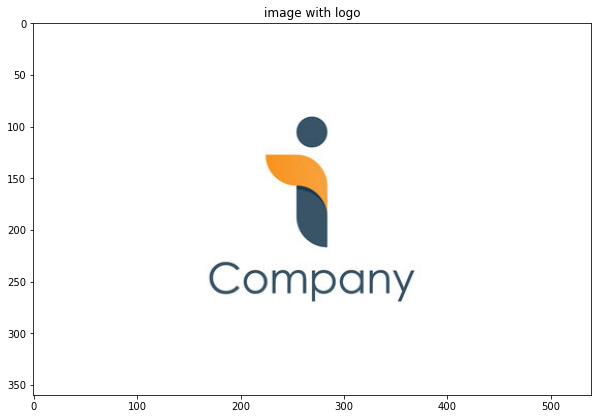

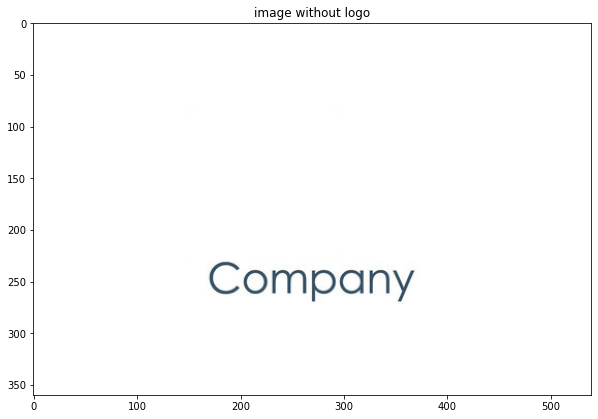

In [37]:
#removing logo - method 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color
image_with_logo=plt.imread('logo.jpg')
mask=np.zeros(image_with_logo.shape[:-1])
mask[80:230,150:300]=1
image_logo_removed=inpaint.inpaint_biharmonic(image_with_logo,
                                             mask,multichannel=True)
plt.title('image with logo')
plt.imshow(image_with_logo)
plt.show()
plt.title('image without logo')
plt.imshow(image_logo_removed)
plt.show()

In [44]:
#inverting image code
from PIL import Image
from PIL import ImageFilter
import os

def main():
    inPath ="C:/Users/User/Desktop/images"
    outPath ="C:/Users/User/Desktop/IP"
    for imagePath in os.listdir(inPath):
        inputPath = os.path.join(inPath, imagePath)
        img = Image.open(inputPath)
        fullOutPath = os.path.join(outPath, 'invert_'+imagePath)
        img.rotate(90).save(fullOutPath)
        print(fullOutPath)
